In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pyrfr.regression as rfreg

In [2]:
# Sets plot styles
sns.set_style('darkgrid')
sns.set_color_codes()
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [3]:
# Location of fitted forests
fitted_forest_file = b'fitted_forests/parameter_fitting_run.bin'

In [4]:
# Create forest
reg_forest = rfreg.binary_rss()

In [5]:
# Load forest
reg_forest.load_from_binary_file(fitted_forest_file)

In [6]:
# Load Data
feats = np.load('full_runs_data.npy')
response = np.load('full_response.npy')

In [7]:
feats_df = pd.DataFrame(feats)
error_df = pd.DataFrame(response)

In [9]:
total_df = pd.concat([error_df,feats_df], axis=1)
total_df.columns =['error'] +['param_'+str(i) for i in range(28)]

In [9]:
best_df = total_df[total_df['error'] == total_df.error.min()]

In [13]:
dif_configs = 10

In [23]:
best_df = total_df[total_df['error'] == total_df.error.min()].sample(n=dif_configs, replace=False)

In [10]:
best_df = total_df.ix[[456,539,224,538,388,304,457,303,734,221]]

In [ ]:
best_df

In [11]:
# Number of samples to extrapolate
nsamples = 1500

prediction_window = np.linspace(1e-4, 2e-1, num=nsamples)

In [4]:
# Matrix of one parameter variation. In this case learning rate, feat[10]
# We will use the configuration with the best cross-validation error
# and then change one parameter

Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.1295164884151221, 0.22266616163370445)
learning rate of best predicted error is 0.0130354903269
Best predicted error in window is 0.129516488415
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.11501046087239587, 0.22914683534099597)
learning rate of best predicted error is 0.00916817878586
Best predicted error in window is 0.115010460872
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.20722353024088547, 0.3228019959017734)
learning rate of best predicted error is 0.00916817878586
Best predicted error in window is 0.202143412402
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.2214554386067709, 0.33381518066585075)
learning rate of best predicted error is 0.0001
Best predicted error in window is 0.219437893359
Best X-Validation error is 0.012346
Best predicted X-Validation error is (0.24159673494318168, 0.23595845649881778)
learni

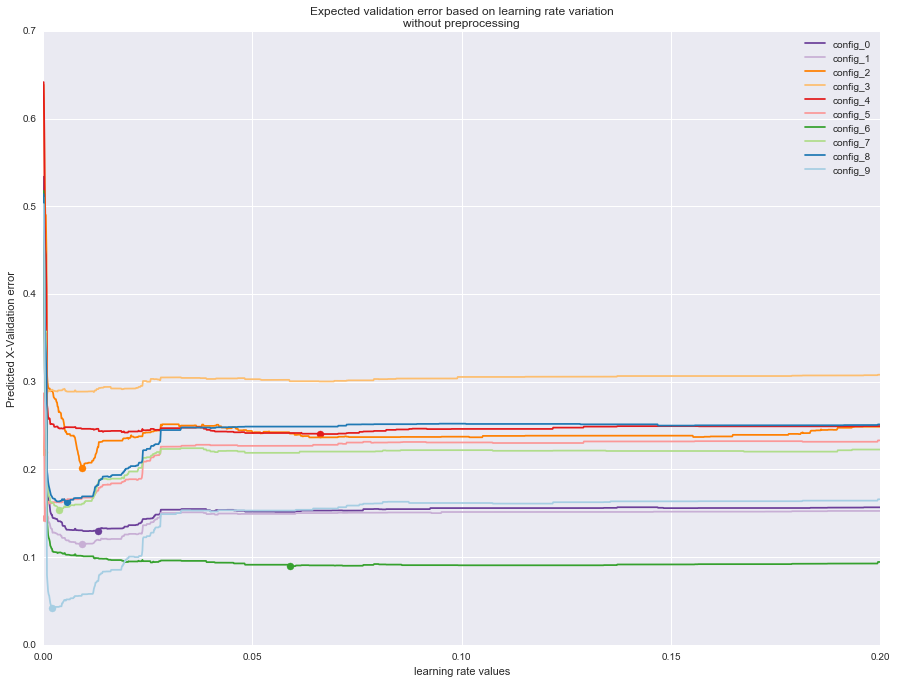

In [14]:
# Create canvas
fig1 = plt.figure(1, figsize=(15.,11.))
ax1 = plt.subplot(111)
color_stack = sns.color_palette('Paired',dif_configs)

for i in range(best_df.shape[0]):
    best_array = np.array(best_df.iloc[i, 1:].values, order='C')
    response_value = np.array(best_df.iloc[i,0], order='C')
    best_config = np.tile(best_array, (nsamples, 1))
    best_config[:, 10] = prediction_window

    print("Best X-Validation error is {}".format(response_value))
    print("Best predicted X-Validation error is {}".format(reg_forest.predict(best_array)))

    pred_performance = np.zeros((nsamples, 2))

    for j in range(nsamples):
        pred_performance[j] = reg_forest.predict(best_config[j])

    mean_pred_performance = pred_performance[:, 0]
    std_pred_performance = pred_performance[:, 1]
    
    print("learning rate of best predicted error is {}".format(best_config[np.argmin(mean_pred_performance) ,10]))
    print("Best predicted error in window is {}".format(np.min(mean_pred_performance)))
    
    color_chosen = color_stack.pop()
    #plt.fill_between(prediction_window, mean_pred_performance+std_pred_performance,
    #                 mean_pred_performance-std_pred_performance, facecolor=color_chosen, alpha=0.1)
    ax1.scatter(best_config[np.argmin(mean_pred_performance) ,10], np.min(mean_pred_performance),
                s=50, color=color_chosen)
    ax1.plot(prediction_window, mean_pred_performance, color=color_chosen, label='config_'+str(i))
    #ax1.scatter(best_array[10], response_value, color=color_chosen)
    ax1.set_xlim(0.0, 0.2)
    ax1.set_xlabel('learning rate values')
    ax1.set_ylabel('Predicted X-Validation error')
    plt.title(u'Expected validation error based on learning '
              u'rate variation\nwithout preprocessing')
    plt.legend()

35